# Topic Modelling

**Topic Modeling** refers to the process of dividing a corpus of documents in two:

1. A list of the topics covered by the documents in the corpus. Each topic is represented by a set of words (terms)
2. Several sets of documents from the corpus grouped by the topics they cover.

The underlying assumption is that every document comprises a *statistical mixture of topics*, i.e. a statistical distribution of topics that can be obtained by “adding up” all of the distributions for all the topics covered. What topic modeling methods do is try to figure out which topics are present in the documents of the corpus and how strong that presence is.

Topic modeling is usually used on very *large* collections of *unstuctured data*, for example, texts in a natural language.

A **topic model** is a model of a text collection that shows which topics each document belongs to and which words (terms) define each topic. This does not require any manual annotation; topic modellig is unsupervised. Topic models don't understand the meaning of a text, but they are able to answer the questions “what is this text about” or “what topics do these texts have in common”.

### Topic modelling vs Clustering
Topic modeling is a kind of "soft" clustering that allows a document to belong to multiple clusters (= topics). 

Topics cannot be strictly defined, neither semantically nor epistemologically. They are identified exclusively by means of an automatic likelihood estimation of the co-occurrence of words. A word can be attributed to several topics, but its probaility and "neighbours" will be different. High-frequency words will have approximately the same probability for every topic.

### Topic modelling vs Topic classification
* **Topic modelling** is an unsupervised ML algorithm similar to clustering, but "softer". It doesn't require any pretraining.
* **Topic classification** is a classification task, and a classifier requires pre-training on labelled data. Topics don't have to be represented by sets of words as in Topic Modelling; here, they are just class labels.


### Usage of topic modelling

* exploratory search (e.g. in electronic libraries);
* semantic search (by meaning, not by keywords);
* event detection and tracking in news streams;
* community identification in social networks;
* building user interests profiles in recommender systems;
* annotation of images;
* search for anomalous object behavior in video streams;
* detecting patterns in client behavious on transactional data.

### Building a topic model 

* $ p (w | t) $ - matrix of the conditional distributions of words by topic
* $ p (t | d) $ - matrix of the conditional distributions of topics by documents
* $ d $ - document
* $ w $ - word
* $ d, w $ - observed variables
* $ t $ - topic (hidden variable)

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/%D0%A2%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C.png/1280px-%D0%A2%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C.png' width='600' align='left'>


### Topic modelling algortihms

* LSA (LSI)
* pLSA (pLSI)
* LDA
* ARTM
* ...

In [1]:
import numpy as np
import pandas as pd
import re
import os

# LSA and LDA
from gensim.models import *
from gensim import corpora
from gensim import similarities

# here is where Tf-idf vectoriser lives
from sklearn.feature_extraction.text import *

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# edit this path if the "Enterprise Ireland" folder is not in the root folder of your Google Drive
%cd "/content/drive/MyDrive/Enterprise Ireland/Topic modelling"

/content/drive/.shortcut-targets-by-id/1N706vlxkJFB8MtqVZMvtpZgevhrp-dTp/Enterprise Ireland/Topic modelling


## Data preprocessing

The data is 164 prose narrative texts available on CELT.

1. Removing stopwords (high-frequency prepositions, conjunctions and other funcion words)
2. Lowercasing
3. Removing punctuation
4. Tokenising texts (the easiest "naive" tokenisation: splitting by whitespace)

In [21]:
with open('early_irish_stopwords.txt', 'r', encoding='utf-8') as f:
    sw = f.read().split('\n')
    
sw[:10]

["'ga", "'n-a", "'na", "'s", "'san", "'sin", '_&_', '_i_', 'a', 'ac']

In [22]:
texts = []
path = "./data"

for root, dirs, files in os.walk(path):
    for file in files:
        with open(os.path.join(root,file), "r", encoding="utf-8") as f:
            text = f.read().lower()
            text = text.replace("\n", " ")
            texts.append(text)

punct = '[!"#$%&()*+,./:;<=>?@[\]^_`{|}~„“«»†*/\—–‘’]'

texts = [re.sub(punct, '', text) for text in texts]

tokenized_texts = []
for text in texts:
    text = [w for w in text.split() if w not in sw]
    tokenized_texts.append(text)

In [23]:
print(len(tokenized_texts))
print(tokenized_texts[10][:100])

164
['immacallam', 'druad', 'brain', 'banfháitho', 'febuil', 'mese', 'nad', 'fessed', 'aircdine', 'basi', 'fer', 'fesso', 'bic', 'maidm', 'form', 'imbiric', 'nubimmis', 'ndún', 'brain', 'óul', 'isinn', 'úargaim', 'fíadum', 'nenaisc', 'triunu', 'luig', 'fius', 'ardniulu', 'rosaig', 'fius', 'tiprait', 'glan', 'sais', 'curi', 'mban', 'seuít', 'banchuiri', 'bíth', 'fiur', 'fudgébad', 'már', 'fríth', 'arit', 'amri', 'int', 'séuit', 'glain', 'file', 'toíb', 'sruibe', 'brain', 'nusóirfed', 'túaid', 'noala', 'fodsloig', 'oldom', 'macrígi', 'libur', 'chétna', 'imacaldaim', 'druag', 'brain', 'innaní', 'banfáitho', 'febuil', 'hóas', 'loch', 'febuil', 'febul', 'fortemen', 'graigech', 'coimnu', 'n-intgaireth', 'basi', 'díchóim', 'inbi', 'ríg', 'maige', 'fuinnside', 'áildéi', 'maigi', 'noréithmis', 'áildi', 'tíre', 'notéigmis', 'álaind', 'tír', 'adscuirmis', 'álaind', 'céol', 'nocluinmis', 'mad', 'gnáthu', 'chóini', 'teistis', 'ndóine', 'inid', 'glassforce', 'chlochach', 'mag']


## Vectorising documents

### Bag of words
Let's build a vocabulary, where every word will be mapped to a unique index, and then transform our texts using this mapping. We will represent each text as a bag of words, which means word order will not be taken into account.

![](https://raw.githubusercontent.com/ancatmara/data-science-nlp/master/img/bow.png)

The hyperparameters to play with here are the minimum and maximum frequencies of a word to be included in a vocabulary. They depend on the size and the homogenity of a corpus. If we take the whole CELT covering texts of different genres from Old Irish to Classical Modern Irish periods, we will get the following vocabulary sizes for different minimum frequencies.
* min = 5, vocab_size = 29,189
* min = 2, vocab_size = 100,120
* min = 1, vocab_size = 345,334

More than 2/3 of words in our corpus occur onle once, which suggests the results won't be very good.

In [25]:
# building an indexed vocabulary with doc2vec
print('Making dictionary...')
dictionary = corpora.Dictionary(tokenized_texts)
print('Original: {}'.format(dictionary))
dictionary.filter_extremes(no_below = 1, no_above = 0.8, keep_n=None)
dictionary.save('celt.dict')
print('Filtered: {}'.format(dictionary))

# replacing words with indices
print('Vectorizing corpus...')
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]
corpora.MmCorpus.serialize('celt.model', corpus) 

Making dictionary...
Original: Dictionary(130354 unique tokens: ['alailiu', 'amar', 'ampersir', 'araili', 'claind']...)
Filtered: Dictionary(130354 unique tokens: ['alailiu', 'amar', 'ampersir', 'araili', 'claind']...)
Vectorizing corpus...


### Tf-idf

At the previous step, we computed absolute frequencies of each word in a text, but we can use a more advanced technique called **tf-idf**. It takes into account not only how frequent words are in a given document, but also how frequent words are in the whole corpus of documents. 

* **Tf** = term frequency
* **Idf** = inverse document frequency
* **Tf-idf** = a statistical measure used to evaluate how important a word is to a document in a collection or corpus; the importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus (source)
* **Term** ≈ word
* **Document** ≈ text

#### How to compute tf-idf

* **Tf** = (number of times term **t** appears in document **d**) / (total number of terms in document **d**)
* **Idf** = log (total number of documents in a corpus / number of documents containing term **t**) 
* **Tf-idf** = tf * idf


#### What does it mean?

1. If a word occurs in all texts in a corpus it’s not characteristic to any of them, so it will get a weight of 0. That’s the case of function words like “the”.
2. If a word occurs many times in (a) particular text(s) and doesn’t occur elsewhere in the corpus, it will get a very high tf-idf score for this/these text(s) and can be used as a distinctive feature. That’s basically vanilla stylometry.
3. **Tf**, and, hence, **tf-idf** allows to move from absolute to relative frequencies and to take text length into account. **Tf** is simply one of the ways to normalize frequencies.

Once tf-idf frequencies have been computed, we can create a Document-term matrix which shows the tf-idf value for each term in a given document. This matrix will have rows for every document in the corpus and columns for every term considered.

![](https://raw.githubusercontent.com/ancatmara/data-science-nlp/master/img/lsa1.png)

In [26]:
# tf-idf vectors
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

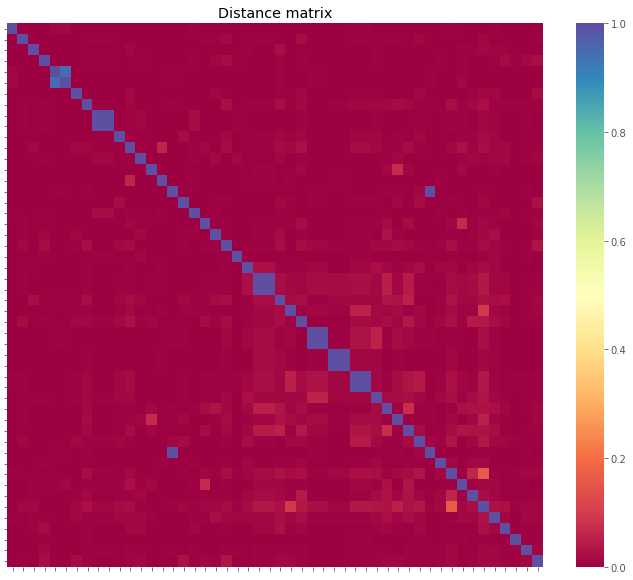

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

sampling_tfidf = corpus_tfidf[:50]

# computing cosine similarity of tf-idf vectors
index = similarities.MatrixSimilarity(sampling_tfidf)
sims = index[sampling_tfidf]

plt.figure(figsize = (12,10))
sns.heatmap(data=sims, cmap = 'Spectral').set(xticklabels=[], yticklabels=[])
plt.title("Distance matrix")
plt.show()

## LSI (LSA)


<img src="https://raw.githubusercontent.com/ancatmara/data-science-nlp/master/img/svd.png" width="500" align="left" style="padding-right: 50px;">

This Document-term matrix can be decomposed into the product of 3 matrices (USV) by using *singular value decomposition* **(SVD)**. Linear algebra guarantees that the S matrix will be diagonal and LSA will consider each singular value, i.e. each of the numbers in the main diagonal of matrix S, as a potential topic found in the documents.

$A = U\Sigma V^{T}$

The **U** matrix is known as the *Document-topic matrix* and the **V** matrix is known as the *Term-topic matrix*.

<img src="https://raw.githubusercontent.com/ancatmara/data-science-nlp/master/img/lsa2.png" width="1000" align="left">



Now, if we keep the largest t singular values together with the first t columns of **U** and the first **t** rows of **V**, we can obtain the **t** more frequent topics found in our original Document-term matrix. We call this **truncated SVD** since it does not keep all of the singular values of the original matrix and, in order to use it for LSA, we will have to set the value of **t** as a hyperparameter. Here is an animation of the process.

![](https://raw.githubusercontent.com/ancatmara/data-science-nlp/master/img/lsa.gif)

In [49]:
%time lsi = lsimodel.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=5, chunksize=50)

CPU times: user 28.1 s, sys: 2.77 s, total: 30.9 s
Wall time: 16.5 s


In [50]:
lsi.show_topics(num_topics=5, num_words=10, formatted=False) # it's not necessary to show all topics

[(0,
  [('chulaind', 0.2641771346753939),
   ('ailill', 0.14777852262114233),
   ('conchobor', 0.13001822163124133),
   ('cú', 0.12681171669809718),
   ('iarom', 0.12364011382454454),
   ('cu', 0.11840501478512404),
   ('culaind', 0.1161098906366744),
   ('medb', 0.09739493712454023),
   ('íarom', 0.09481670257543924),
   ('conall', 0.09299929691003107)]),
 (1,
  [('fomore', -0.2632808529125336),
   ('dagdae', -0.19454617585433312),
   ('bres', -0.1464405854985895),
   ('erenn', -0.1262710427502275),
   ('conchubur', 0.1248412725111227),
   ('dno', -0.12150578076573922),
   ('chulaind', 0.11006221169389409),
   ('íarom', 0.10977570812505137),
   ('lug', -0.10950110930786366),
   ('corc', -0.10791563967148304)]),
 (2,
  [('conchubur', -0.23567375606157487),
   ('bodach', 0.220056846926886),
   ('fomore', -0.17176659165045643),
   ('íarom', -0.1628169028703204),
   ('finnchóem', -0.139975112921807),
   ('am', -0.12036037674781865),
   ('caol', 0.11482596251092395),
   ('lug', -0.10324136

How does dimensionality reduction influence the distance matrix?

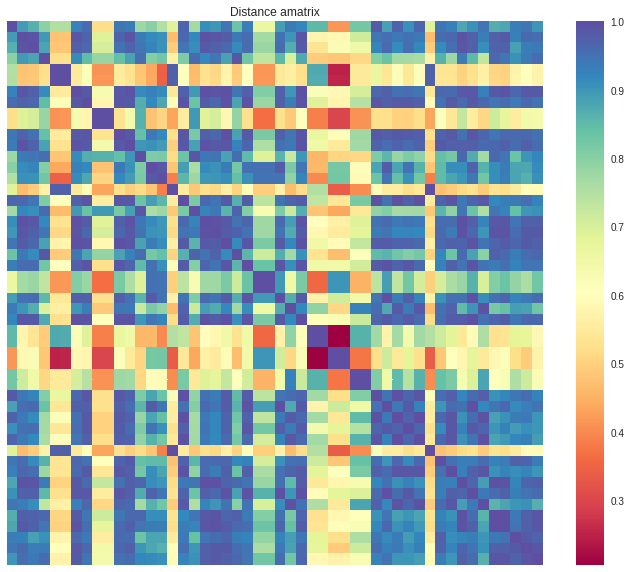

In [51]:
# sampling = random.choices(corpus, k=20)
sampling = corpus_tfidf[:50]

sampling_lsi = lsi[sampling]
index = similarities.MatrixSimilarity(lsi[sampling])
sims = index[sampling_lsi]
sims  = (sims + 1)/2.

plt.figure(figsize = (12,10))
sns.heatmap(data=sims, cmap = 'Spectral').set(xticklabels=[], yticklabels=[])
plt.title("Distance amatrix")
plt.show()

## LDA

*Latent Dirichlet Allocation* **(LDA)** is based on the same underlying assumptions as LSA:

1. The distributional hypothesis, (i.e. similar topics make use of similar words)
2. The statistical mixture hypothesis (i.e. documents talk about several topics) for which a statistical distribution can be determined. 

The purpose of LDA is mapping each document in our corpus to a set of topics which covers a good deal of the words in the document.

What LDA does in order to map the documents to a list of topics is assign topics to arrangements of words, e.g. n-grams such as "best player" for a topic related to sports. This stems from the assumption that documents are written with arrangements of words and that those arrangements determine topics. Yet again, just like LSA, LDA also ignores syntactic information and treats documents as bags of words. It also assumes that all words in the document can be assigned a probability of belonging to a topic. That said, the goal of LDA is to determine the mixture of topics that a document contains.

In other words, LDA assumes that topics and documents look like this:

<img src="https://d33wubrfki0l68.cloudfront.net/7c974a2f6d1b2807f4ee7c589f2e63c9843fd936/6c3e9/static/4fbb5fc319aef0946ed9579db24e4dce/a2906/85066c68036e4e949fe9f680a071f3fd.png" width="1000" align="left">

And, when LDA models a new document, it works this way:

<img src="https://d33wubrfki0l68.cloudfront.net/d5707f4d1c95b701ec3aac1b9ea9522c0b3c53b0/17107/static/6e9f10d41b8953374e8c9678df03ca6a/a2906/db5acced596a400ca6650486904e1660.png" width="1000" align="left">

**NB!** *The main difference between LSA and LDA is that LDA assumes that the distribution of topics in a document and the distribution of words in topics are Dirichlet distributions. LSA does not assume any distribution and therefore, leads to more opaque vector representations of topics and documents.*

There are two **hyperparameters** that control document and topic similarity, known as *alpha* and *beta*, respectively. A low value of alpha will assign fewer topics to each document whereas a high value of alpha will have the opposite effect. A low value of beta will use fewer words to model a topic whereas a high value will use more words, thus making topics more similar between them. 

A third hyperparameter has to be set when implementing LDA, namely, the number of topics the algorithm will detect since LDA cannot decide on the number of topics by itself.

In [ ]:
print("Training model...")

%time lda = ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=5, chunksize=50, update_every=1, passes=2)

In [53]:
lda.show_topics(num_topics=5, num_words=10, formatted=False)

[(0,
  [('ailill', 0.00023438786),
   ('chulaind', 0.00023229764),
   ('cú', 0.00019359223),
   ('medb', 0.00016933797),
   ('chuluinn', 0.00014477067),
   ('iarom', 0.00014072379),
   ('cu', 0.00013608344),
   ('fráech', 0.00012147124),
   ('culaind', 0.000118490505),
   ('conchobor', 0.000107794454)]),
 (1,
  [('cimbaeth', 1.821875e-05),
   ('partraige', 1.7961143e-05),
   ('chloinn', 1.50468395e-05),
   ('tuan', 1.33913845e-05),
   ('dithorbae', 1.2862172e-05),
   ('dithorbai', 1.28564025e-05),
   ('fachtna', 1.2292746e-05),
   ('fathach', 1.1750774e-05),
   ('n-oirbsen', 1.1633693e-05),
   ('oirisen', 1.1633693e-05)]),
 (2,
  [('fomore', 4.4352335e-05),
   ('dno', 3.6399437e-05),
   ('fergal', 3.4662065e-05),
   ('gyi', 3.1412823e-05),
   ('roi', 2.736526e-05),
   ('chulinn', 2.5446949e-05),
   ('bres', 2.4912577e-05),
   ('ierum', 2.4549092e-05),
   ('erenn', 2.2636921e-05),
   ('dagdae', 2.252845e-05)]),
 (3,
  [('corc', 2.548753e-05),
   ('cethraca', 1.6794856e-05),
   ('hocus',

### LDAVis

LDAVis provides an interactive visualisation of topics and words that define them. [Here is a good article](https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#13.-t-SNE-Clustering-Chart) on topic modelling visualisation (with code).

In [ ]:
!pip install pyLDAvis

In [54]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis

%time vis_data = gensimvis.prepare(lda, corpus_tfidf, dictionary)
pyLDAvis.display(vis_data)

CPU times: user 5.64 s, sys: 2.23 s, total: 7.87 s
Wall time: 10.1 s


## t-SNE

**TSNE** *(t-distributed stochastic neighbor embedding)* is a statistical method for visualizing high-dimensional data by giving each datapoint a location in a two or three-dimensional map. Basically, it is a dimensionality reduction technique that can be used for a topic model visualisation.

### yellowbrick

In [ ]:
!pip install yellowbrick

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ga'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


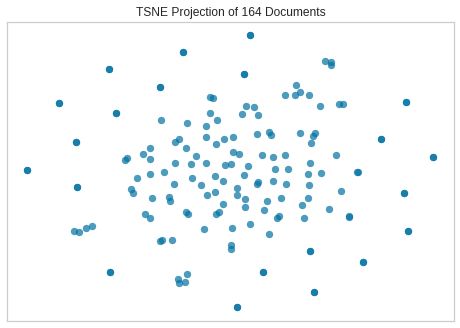

In [55]:
import yellowbrick
from yellowbrick.text import TSNEVisualizer
from sklearn.manifold import TSNE
from sklearn.cluster import *

data = [' '.join(text) for text in tokenized_texts]
vect = TfidfVectorizer(max_df=0.8, min_df=1, ngram_range=(1,3), analyzer='word', stop_words = sw)
X = vect.fit_transform(data)
X.shape

tsne = TSNEVisualizer()
tsne.fit(X)
tsne.poof()

We can paint the projection according to some attributes. For example, we can find clusters with KMeans and assign a colour to each text according to its cluster label.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

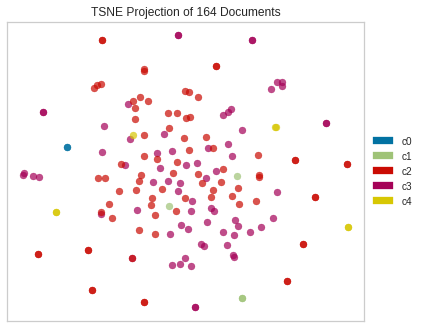

In [56]:
clf = KMeans(n_clusters=5)
clf.fit_transform(X)
colors = ["c{}".format(c) for c in clf.labels_]

tsne = TSNEVisualizer()
tsne.fit(X, colors)
tsne.poof()

### sklearn

In [57]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import *

In [58]:
# linear dimensionality reduction with PCA
# this may take a long time if the vocabulary is big
%time X_reduced = PCA(n_components=30, random_state=42).fit_transform(X.todense())

CPU times: user 25.9 s, sys: 3.29 s, total: 29.2 s
Wall time: 17.3 s


In [59]:
# non-linear dimensionality reduction with TSNE
%time X_embedded = TSNE(n_components=2, perplexity=5, verbose=0).fit_transform(X_reduced)

CPU times: user 1.38 s, sys: 9.6 ms, total: 1.39 s
Wall time: 713 ms


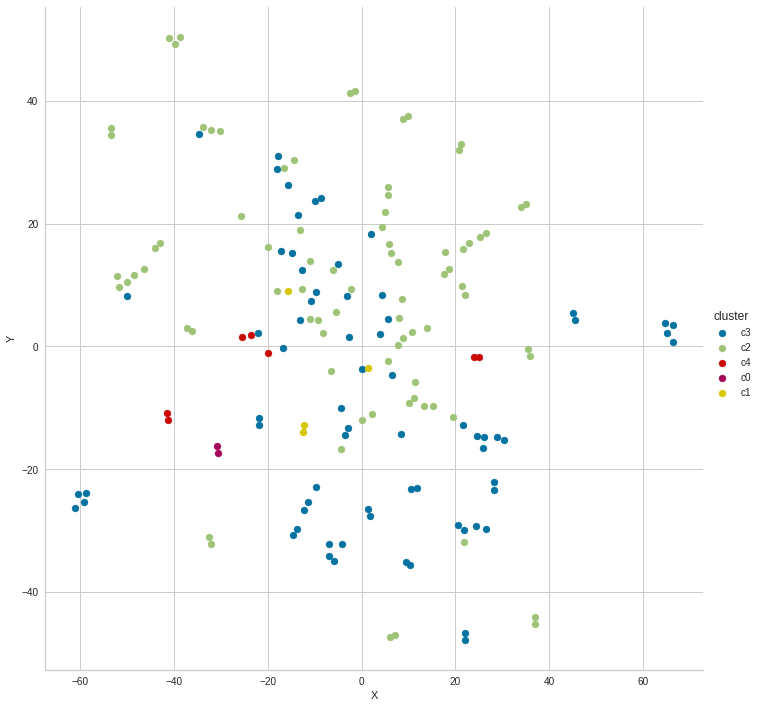

In [60]:
vis_df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'cluster': colors})
sns.FacetGrid(vis_df, hue='cluster', height=10).map(plt.scatter, "X", "Y").add_legend()

### Reading

* Intro to Topic Modelling: http://topicmodels.info/ckling/tmt/part1.pdf
* Another intro to topic modelling: https://monkeylearn.com/blog/introduction-to-topic-modeling/ 
* LDA: http://topicmodels.info/ckling/tmt/part3.pdf 
* A lecture on topic modelling evaluation (slides in English): http://topicmodels.info/ckling/tmt/part4.pdf 
* Topic Modelling in R: https://www.tidytextmining.com/topicmodeling.html 